# Getting started with the practicals

***These notebooks are best viewed in Jupyter. GitHub might not display all content of the notebook properly.***

## Goal of the practical exercises

The exercises have two goals:

1. Give you the opportunity to obtain 'hands-on' experience in implementing, training and evaluation machine learning models in Python. This experience will also help you better understand the theory covered during the lectures. 

2. Occasionally demonstrate some 'exam-style' questions that you can use as a reference when studying for the exam. Note however that the example questions are (as the name suggests) only examples and do not constitute a complete and sufficient list of 'things that you have to learn for the exam'. You can recognize example questions as (parts of) exercises by <font color="#770a0a">this font color</font>.

For each set of exercises (one Python notebook such as this one $==$ one set of exercises) you have to submit deliverables that will then be graded and constitute 25% of the final grade. Thus, the work that you do during the practicals has double contribution towards the final grade: as 25% direct contribution and as a preparation for the exam that will define the other 65% of the grade.

## Deliverables

For each set of exercises, you have to submit:
1. Python functions and/or classes (`.py` files) that implement basic functionalities (e.g. a $k$-NN classifier) and 
2. A *single* Python notebook that contains the experiments, visualization and answer to the questions and math problems. *Do not submit your answers as Word or PDF documents (they will not be graded)*. The submitted code and notebook should run without errors and be able to fully reproduce the reported results.

We recommend that you clone the provided notebooks (such as this one) and write your code in them. The following rubric will be used when grading the practical work:

Component  | Insufficient | Satisfactory | Excellent
--- | --- | --- | ---
**Code** | Missing or incomplete code structure, runs with errors, lacks documentation | Self-contained, does not result in errors, contains some documentation, can be easily used to reproduce the reported results | User-friendly, well-structured (good separation of general functionality and experiments, i.e. between `.py` files and the Pyhthon notebook), detailed documentation, optimized for speed, <s>use of a version control system (such as GitHub)</s>
**Answers to questions** | Incorrect, does not convey understanding of the material, appears to be copied from another source | Correct, conveys good understanding of the material, description in own words | Correct, conveys excellent level of understanding, makes connections between topics

## A word on notation

When we refer to Python variables, we will use a monospace font. For example, `X` is a Python variable that contains the data matrix. When we refer to mathematical variables, we will use the de-facto standard notation: $a$ or $\lambda$ is a scalar variable, $\boldsymbol{\mathrm{w}}$ is a vector and $\boldsymbol{\mathrm{X}}$ is a matrix (e.g. a data matrix from the example above). You should use the same notation when writing your answers and solutions.

# Two simple machine learning models

## Preliminaries

Throughout the practical curriculum of this course, we will use the Python programming language and its ecosystem of libraries for scientific computing (such as `numpy`, `scipy`, `matplotlib`, `scikit-learn` etc). The practicals for the deep learning part of the course will use the `keras` deep learning framework. If you are not sufficiently familiar with this programming language and/or the listed libraries and packages, you are strongly advised to go over the corresponding tutorials from the ['Essential skills'](https://github.com/tueimage/essential-skills) module (the `scikit-learn` library is not covered by the tutorial, however, an extensive documentation is available [here](https://scikit-learn.org/stable/documentation.html).

In this first set of exercises, we will use two toy datasets that ship together with `scikit-learn`. 

The first dataset is named `diabetes` and contains 442 patients described with 10 features: age, sex, body mass index, average blood pressure, and six blood serum measurements. The target variable is a continuous quantitative measure of the disease (diabetes) progression one year after the baseline measurements were recorded. More information is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/diabetes.rst) and [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

The second dataset is named `breast_cancer` and is a copy of the UCI ML Breast Cancer Wisconsin (Diagnostic) datasets (more infortmation is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/breast_cancer.rst) and [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The datasets contains of 569 instances represented with 30 features that are computed from a images of a fine needle aspirate of a breast mass. The features describe characteristics of the cell nuclei present in the image. Each instance is associated with a binary target variable ('malignant' or 'benign'). 

You can load the two datasets in the following way:

In [2]:
import numpy as np
from sklearn.datasets import load_diabetes, load_breast_cancer

diabetes = load_diabetes()

breast_cancer = load_breast_cancer()

In the majority of the exercises in this course, we will use higher-level libraries and packages such as `scikit-learn` and `keras` to implement, train and evaluate machine learning models. However, the goal of this first set of exercises is to illustrate basic mathematical tools and machine learning concepts. Because of this, we will impose a restriction of only using basic `numpy` functionality. Furthermore, you should as much as possible restrict the use of for-loops (e.g. use a vector-to-matrix product instead of a for loop when appropriate).

If `X` is a 2D data matrix, we will use the convention that the rows of the matrix contain the samples (or instances) and the columns contain the features (inputs to the model). That means that a data matrix with a shape `(122, 13)` represents a dataset with 122 samples, each represented with 13 features. Similarly, if `Y` is a 2D matrix containing the targets, the rows correspond to the samples and the columns to the different targets (outputs of the model). Thus, if the shape of `Y` is `(122, 3)` that means that there are 122 samples and each sample is has 3 targets (note that in the majority of the examples we will only have a single target and thus the number of columns of `Y` will be 1).

You can obtain the data and target matrices from the two datasets in the following way:

In [3]:
X = diabetes.data
Y = diabetes.target[:, np.newaxis]

print(X.shape)
print(Y.shape)

(442, 10)
(442, 1)


If you want to only use a subset of the available features, you can obtain a reduced data matrix in the following way:

In [4]:
# use only the fourth feature
X = diabetes.data[:, np.newaxis, 3]
print(X.shape)

# use the third, and tenth features
X = diabetes.data[:, (3,9)]
print(X.shape)

(442, 1)
(442, 2)


***Question***: Why we need to use the `np.newaxis` expression in the examples above? 

Note that in all your experiments in the exercises, you should use and independent training and testing sets. You can split the dataset into a training and testing subsets in the following way:

In [5]:
# use the fourth feature
# use the first 300 training samples for training, and the rest for testing
X_train = diabetes.data[:300, np.newaxis, 3]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, np.newaxis, 3]
y_test = diabetes.target[300:, np.newaxis]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 1)
(300, 1)
(142, 1)
(142, 1)


## Exercises

### Linear regression

Implement training and evaluation of a linear regression model on the diabetes dataset using only matrix multiplication, inversion and transpose operations. Report the mean squared error of the model.

To get you started we have implemented the first part of this exercise (fitting of the model) as an example.

In [6]:
# add subfolder that contains all the function implementations
# to the system path so we can import them
import sys
sys.path.append('code/')

# the actual implementation is in linear_regression.py,
# here we will just use it to fit a model
from linear_regression import *

# load the dataset
# same as before, but now we use all features
X_train = diabetes.data[:300, :]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, :]
y_test = diabetes.target[300:, np.newaxis]

beta = lsq(X_train, y_train)

# print the parameters
print(beta)

[[ 152.34786452]
 [ -16.57607993]
 [-254.66532396]
 [ 560.98630022]
 [ 278.91811152]
 [-393.41357305]
 [  97.05460405]
 [ -19.0023093 ]
 [ 169.46450327]
 [ 632.95050374]
 [ 114.21638941]]


### Weighted linear regression

Assume that in the dataset that you use to train a linear regression model, there are identical versions of some samples. This problem can be reformulated to a weighted linear regression problem where the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$ (or the vector $\boldsymbol{\mathrm{y}}$ if there is only a single target/output variable) contain only the unique data samples, and a vector $\boldsymbol{\mathrm{d}}$ is introduced that gives more weight to samples that appear multiple times in the original dataset (for example, the sample that appears 3 times has a corresponding weight of 3). 

<p><font color='#770a0a'>Derive the expression for the least-squares solution of a weighted linear regression model (note that in addition to the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$, the solution should include a vector of weights $\boldsymbol{\mathrm{d}}$).</font></p>

#### Determining the expression for weighted linear regression:

In a weighted linear regression, each data point is assigned a weight d. Similarly to the linear regression, we need to find the value $\beta$ that minimizes the estimated error with the residual sum of squares. However, to make sure the weights are taking into account, the expressions is multiplied by the value of $d_i$ in the given data point. As we can see in the following expression:

$$
WRSS(\boldsymbol{\beta}) = \sum_{i=1}^{n} d_i (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} d_i (y_i - \mathbf{x}_i^T \boldsymbol{\beta})^2
$$


This can be written in matrix form as:

$$
WRSS(\boldsymbol{\beta})=(y-X \beta)^T(y-X \beta)
$$

By taking the dericative with respect to $\beta$, and set it to zero we get the expression, where D is a diagonal matrix with the values of the weights:

$$
\mathbf{X}^T \mathbf{D} \mathbf{y} = \mathbf{X}^T \mathbf{D} \mathbf{X} \boldsymbol{\beta}
$$

Finally solving for beta, we obtain the weighted least-sqared solution:

$$
\boldsymbol{\beta} = (\mathbf{X}^T \mathbf{D} \mathbf{X})^{-1} \mathbf{X}^T \mathbf{D} \mathbf{y}
$$

Additionally, we will change the code provided for the lsq function to accommodate weighted linear regression:


In [16]:
def wlsq(X, y, w):
    """
    Weighted least squares linear regression
    :param X: Input data matrix
    :param y: Target vector
    :param w: Weights vector
    :return: Estimated coefficient vector for the linear regression
    """

    # Add column of ones for the intercept
    ones = np.ones((len(X), 1))
    X = np.concatenate((ones, X), axis=1)

    W = np.diag(w)

    XT_W = np.dot(X.T, W)
    beta = np.dot(np.linalg.inv(np.dot(XT_W, X)), np.dot(XT_W, y))

    return beta

w = np.ones((X_train.shape[0],))

beta = wlsq(X_train, y_train, w)

ones_test = np.ones((len(X_test), 1))
X_test = np.concatenate((ones_test, X_test), axis=1)

y_pred = np.dot(X_test, beta)

print( y_pred)


Predicted values for y_test: [[120.77510961]
 [187.58135817]
 [173.73128216]
 [216.91093071]
 [187.58135817]
 [121.58981995]
 [165.58417876]
 [153.36352354]
 [126.47808204]
 [148.47526145]
 [175.36070294]
 [109.36916472]
 [146.0311304 ]
 [187.58135817]
 [141.14286831]
 [111.81329577]
 [150.91939249]
 [189.21077895]
 [168.02830981]
 [182.69309608]
 [146.0311304 ]
 [206.31969626]
 [194.09904104]
 [185.13722712]
 [158.25178563]
 [102.85148193]
 [126.47808204]
 [170.47244085]
 [106.92503368]
 [148.47526145]
 [180.24896503]
 [124.03395099]
 [204.69027548]
 [170.47244085]
 [133.81047517]
 [141.14286831]
 [124.03395099]
 [199.80201339]
 [126.47808204]
 [114.25742681]
 [243.7963722 ]
 [190.02548921]
 [190.02548921]
 [214.46679966]
 [121.58981995]
 [126.47808204]
 [172.9165719 ]
 [ 97.1485095 ]
 [146.0311304 ]
 [119.1456889 ]
 [226.68745489]
 [126.47808204]
 [116.70155786]
 [124.03395099]
 [165.58417876]
 [160.69591667]
 [138.69873726]
 [163.14004772]
 [131.36634413]
 [172.9165719 ]
 [165.58417

### $k$-NN classification

Implement a $k$-Nearest neighbors classifier from scratch in Python using only basic matrix operations with `numpy` and `scipy`. Train and evaluate the classifier on the breast cancer dataset, using all features. Show the performance of the classifier for different values of $k$ (plot the results in a graph). Note that for optimal results, you should normalize the features (e.g. to the $[0, 1]$ range or to have a zero mean and unit standard deviation).

In [6]:
# Might be needed to run this first, it is not present by default in some environments
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


Accuracy for k=1: 0.5070
Accuracy for k=2: 0.5915
Accuracy for k=3: 0.6197
Accuracy for k=4: 0.7042
Accuracy for k=5: 0.7042
Accuracy for k=6: 0.7606
Accuracy for k=7: 0.7746
Accuracy for k=8: 0.7254
Accuracy for k=9: 0.7676
Accuracy for k=10: 0.7324
Accuracy for k=11: 0.6901
Accuracy for k=12: 0.6620
Accuracy for k=13: 0.6268
Accuracy for k=14: 0.5423
Accuracy for k=15: 0.5211
Accuracy for k=16: 0.5493
Accuracy for k=17: 0.5141
Accuracy for k=18: 0.4859
Accuracy for k=19: 0.4789
Accuracy for k=20: 0.5000


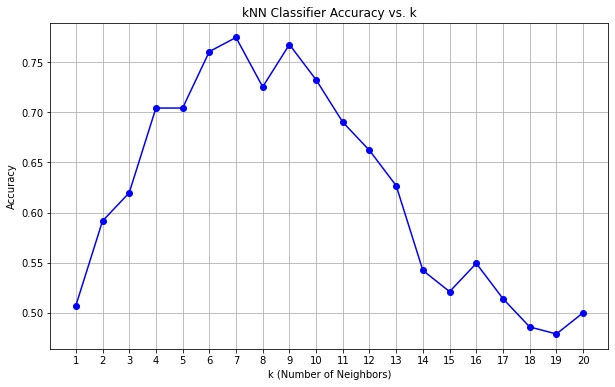

In [7]:
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
import matplotlib.pyplot as plt

# Z-score normalization
def normalize():
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

# Euclidian distance between any 2 points in the data
def euclidian(point_1, point_2):
    
    return np.sqrt(np.sum((point_1 - point_2)**2, axis=1))

# Predict label for a test sample with a knn
def knn_pred(X_train, y_train, X_test_sample, k):
    
    # Get distances
    distances = euclidian(X_train, X_test_sample)

    # Get indices of the k-nearest neighbors of the point
    indices = np.argsort(distances)[:k]

    # Get labels of the k-nearest neighbors of the point

    labels = y_train[indices]

    # Get most common class among those for final labels of new points
    # mode() returns the most frequently appearing element

    return mode(labels).mode[0]

# Predict class label for all test samples (loop over all samples)
def knn_class(X_train, y_train, X_test, k):

    predictions = []
    for X_test_sample in X_test:
        prediction = knn_pred(X_train, y_train, X_test_sample, k)
        predictions.append(prediction)

    return np.array(predictions)
    
# Compute accuracy of made prediction
def get_accuracy(y_true, y_pred):

    # This formula is commonly used to get the accuracy of a prediction, the first statement 
    # in the sum statement creates a boolean array corresponding with correct/incorrect preds.
    return np.sum(y_true == y_pred) / len(y_true)

# Choose k values (here I have them just set from 1 to 21, but you can modify this list as you
# want. Code below executes methods above.

k_vals = range(1, 21)
accuracies = []

for k in k_vals:
    y_pred = knn_class(X_train, y_train, X_test, k)
    acc = get_accuracy(y_test, y_pred)
    accuracies.append(acc)
    print(f'Accuracy for k={k}: {acc:.4f}')

# Plot results

plt.figure(figsize=(10, 6))
plt.plot(k_vals, accuracies, marker='o', linestyle='-', color='b')
plt.title('kNN Classifier Accuracy vs. k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_vals)
plt.grid(True)
plt.show()

### $k$-NN regression

Modify the $k$-NN implementation to do regression instead of classification. Compare the performance of the linear regression model and the $k$-NN regression model on the diabetes dataset for different values of $k$..

### Class-conditional probability

Compute and visualize the class-conditional probability (conditional probability where the class label is the conditional variable, i.e. $P(X = x \mid Y = y_i)$ for all features in the breast cancer dataset. Assume a Gaussian distribution.

Based on visual analysis of the plots, which individual feature can best discriminate between the two classes? Motivate your answer.
<!-- <p><font color='#770a0a'>Based on visual analysis of the plots, which individual feature can best discriminate between the two classes? Motivate your answer.</font></p> -->



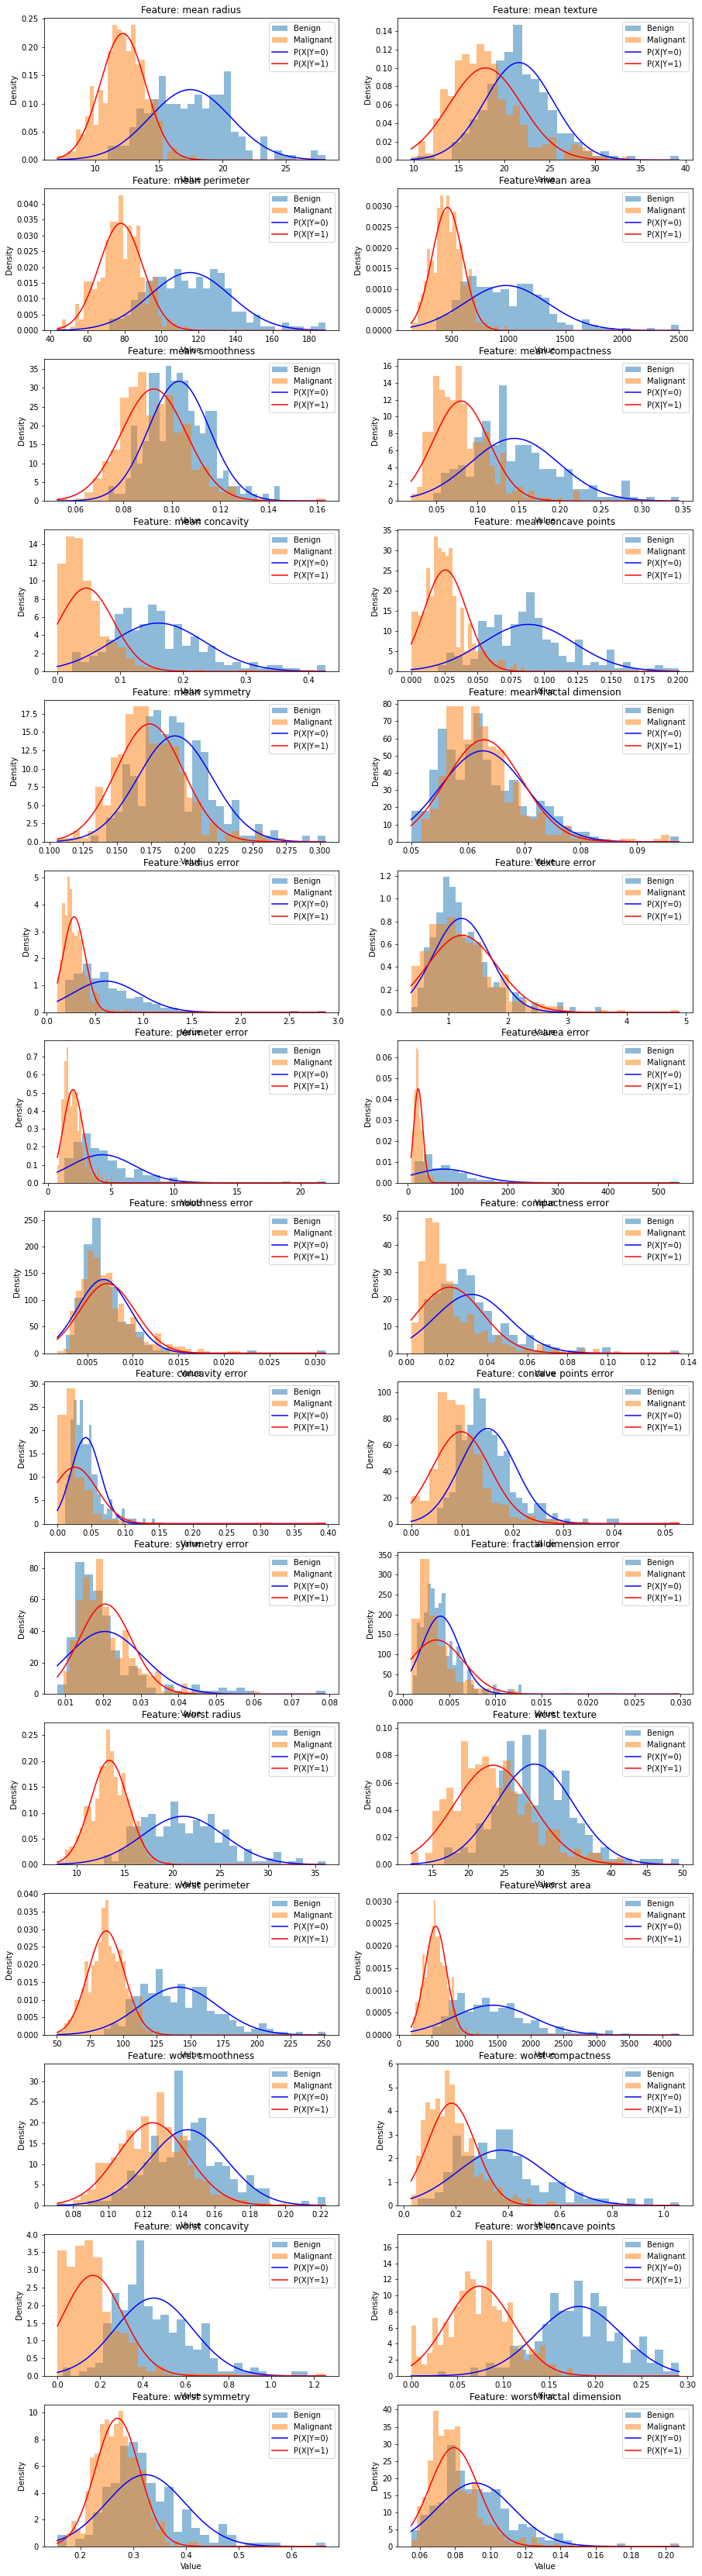

In [22]:
from scipy.stats import norm

X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names

# Function to compute class-conditional probabilities
def class_conditional_prob(X, y, feature_idx):
    classes = np.unique(y)
    means = []
    stds = []
    for c in classes:
        X_c = X[y == c, feature_idx]
        means.append(np.mean(X_c))
        stds.append(np.std(X_c))
    return means, stds

n_features = X.shape[1]
n_rows = (n_features + 1) // 2
fig, axs = plt.subplots(n_rows, 2, figsize=(15, 4*n_rows))
axs = axs.ravel()

for i in range(n_features):
    means, stds = class_conditional_prob(X, y, i)
    
    # Plot histograms
    axs[i].hist(X[y == 0, i], bins=30, density=True, alpha=0.5, label='Benign')
    axs[i].hist(X[y == 1, i], bins=30, density=True, alpha=0.5, label='Malignant')
    
    # Plot probability density functions
    x_range = np.linspace(X[:, i].min(), X[:, i].max(), 200)
    axs[i].plot(x_range, norm.pdf(x_range, means[0], stds[0]), label='P(X|Y=0)', color='blue')
    axs[i].plot(x_range, norm.pdf(x_range, means[1], stds[1]), label='P(X|Y=1)', color='red')
    
    axs[i].set_title(f'Feature: {feature_names[i]}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Density')
    axs[i].legend()

In [19]:
p_values = [class_conditional_prob_and_ttest(X, y, i)[2] for i in range(n_features)]
sorted_features = sorted(zip(feature_names, p_values), key=lambda x: x[1])

print("\nFeatures sorted by p-value (most to least significant):")
for feature, p_value in sorted_features:
    print(f"{feature}: {p_value:.4f}")



Features sorted by p-value (most to least significant):
worst concave points: 0.0000
worst perimeter: 0.0000
mean concave points: 0.0000
worst radius: 0.0000
mean perimeter: 0.0000
worst area: 0.0000
mean radius: 0.0000
mean area: 0.0000
mean concavity: 0.0000
worst concavity: 0.0000
mean compactness: 0.0000
worst compactness: 0.0000
radius error: 0.0000
perimeter error: 0.0000
area error: 0.0000
worst texture: 0.0000
worst smoothness: 0.0000
worst symmetry: 0.0000
mean texture: 0.0000
concave points error: 0.0000
mean smoothness: 0.0000
mean symmetry: 0.0000
worst fractal dimension: 0.0000
compactness error: 0.0000
concavity error: 0.0000
fractal dimension error: 0.0631
smoothness error: 0.1103
mean fractal dimension: 0.7599
texture error: 0.8433
symmetry error: 0.8766
